In [1]:
# import libraries
import pandas as pd
import numpy as np


In [2]:
# load dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing(as_frame=True)
#print(dataset.DESCR)
housing=dataset.frame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
housing.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [4]:
housing.shape

(20640, 9)

In [5]:
# 1.Divide  the dataset into independent and dependent
X=housing.iloc[:,:-1]
y=housing.iloc[:,-1]

In [6]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [8]:
# create correlation  matrix
corr_matrix = X.corr().abs()
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,0.119034,0.326895,0.062040,0.004834,0.018766,0.079809,0.015176
HouseAge,0.119034,1.000000,0.153277,0.077747,0.296244,0.013191,0.011173,0.108197
AveRooms,0.326895,0.153277,1.000000,0.847621,0.072213,0.004852,0.106389,0.027540
AveBedrms,0.062040,0.077747,0.847621,1.000000,0.066197,0.006181,0.069721,0.013344
Population,0.004834,0.296244,0.072213,0.066197,1.000000,0.069863,0.108785,0.099773
AveOccup,0.018766,0.013191,0.004852,0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,0.079809,0.011173,0.106389,0.069721,0.108785,0.002366,1.000000,0.924664
Longitude,0.015176,0.108197,0.027540,0.013344,0.099773,0.002476,0.924664,1.000000


<AxesSubplot:>

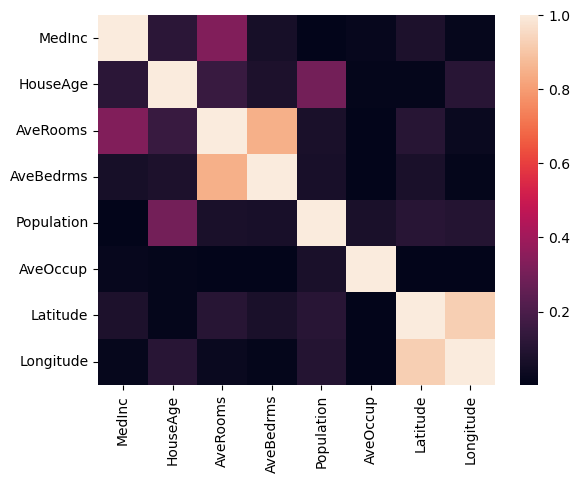

In [9]:
import seaborn as sns
# plotting correlation heatmap & displaying it
sns.heatmap(X.corr().abs())

In [10]:
# select upper traingle of correlation matrix
#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# corr_matrix.shape - gives number of rows and columns in correlation matrix
# np.ones(corr_matrix.shape) - generates matrix having ones of same dimension as correlation matrix
# np.triu(np.ones(corr_matrix.shape), k=1) - generates upper triangular matrix that does not includes diagonal

# np.tril(np.ones(corr_matrix.shape), k=1) - generates lower triangular matrix that does not includes diagonal

# np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool) - converts 1 into True and 0 into False

# Pandas where() function return a dataframe of original size but with NA values on lower triangular correlation matrix.

upper

C:\Users\HP\AppData\Local\Temp\ipykernel_3364\1661924016.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,NaN,0.119034,0.326895,0.062040,0.004834,0.018766,0.079809,0.015176
HouseAge,NaN,NaN,0.153277,0.077747,0.296244,0.013191,0.011173,0.108197
AveRooms,NaN,NaN,NaN,0.847621,0.072213,0.004852,0.106389,0.027540
AveBedrms,NaN,NaN,NaN,NaN,0.066197,0.006181,0.069721,0.013344
Population,NaN,NaN,NaN,NaN,NaN,0.069863,0.108785,0.099773
AveOccup,NaN,NaN,NaN,NaN,NaN,NaN,0.002366,0.002476
Latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.924664
Longitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
upper.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [12]:
# Find index of columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

['AveBedrms', 'Longitude']

In [13]:
X.shape

(20640, 8)

In [14]:
# drop the columns
X = X.drop(X[to_drop], axis=1)
X.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude
0,8.3252,41.0,6.984127,322.0,2.555556,37.88
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86
2,7.2574,52.0,8.288136,496.0,2.802260,37.85
3,5.6431,52.0,5.817352,558.0,2.547945,37.85
4,3.8462,52.0,6.281853,565.0,2.181467,37.85


In [15]:
X.shape

(20640, 6)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=36)

In [17]:
X_train.shape,X_test.shape

((13828, 6), (6812, 6))

In [18]:
# 2. Feature Selection
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()#To make mean =0 and sd =1 using z score formula

In [19]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 2.94615603,  1.69257444,  0.65840852, -0.69623028,  0.00631568,
        -0.67676958],
       [-0.53712836,  0.26178584, -0.61551141, -0.32180199,  0.10882511,
        -0.78878315],
       [ 0.02597188,  0.50025061, -0.14510172, -0.75157303, -0.11288116,
         0.79807576],
       ...,
       [-0.46390242,  0.57973886, -0.72060079, -0.51117796,  0.24671234,
        -0.77478146],
       [ 0.03045085, -0.85104973,  0.29681501, -0.2569472 , -0.04515438,
         1.27880067],
       [ 0.48355594, -0.69207322, -0.02275645,  0.26535   , -0.12518059,
         0.95676166]])

In [20]:
X_test=scaler.transform(X_test)
X_test

array([[ 0.07003245, -1.88439705, -0.14330011,  0.52131022, -0.10560014,
        -0.74677806],
       [-1.04892878,  1.0566684 , -0.26431499, -0.3079663 , -0.01249385,
         1.40014871],
       [ 0.15617449, -0.13565543, -0.33324929,  0.25929688, -0.17835535,
        -0.74211083],
       ...,
       [ 3.81372206,  0.26178584,  0.71929056,  1.16121076, -0.0768889 ,
        -0.71877467],
       [ 2.52179968,  0.26178584,  0.88449779, -0.56738544, -0.03343845,
        -0.69077128],
       [-0.37291683,  0.50025061, -0.01804122, -0.43335222,  0.18848079,
        -0.74677806]])

# Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

regression=LinearRegression()
regression.fit(X_train,y_train)
## prediction
y_pred=regression.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
print("MSE:",mse)
mae=mean_absolute_error(y_test,y_pred)
print("MAE:",mae)
print("RMSE:",np.sqrt(mse))

r2score=r2_score(y_test,y_pred)
print("r2 score:",r2score)
adjr2score=1 - (1-r2score)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("adjusted r2 score:",adjr2score)

MSE: 0.6468324183600854
MAE: 0.5991054384908187
RMSE: 0.8042589249489778
r2 score: 0.499922385804186
adjusted r2 score: 0.4997769650856684


# Ridge Regression

In [22]:
from sklearn.linear_model import Ridge

ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
print("MSE:",mse)
mae=mean_absolute_error(y_test,y_pred)
print("MAE:",mae)
print("RMSE:",np.sqrt(mse))

r2score=r2_score(y_test,y_pred)
print("r2 score:",r2score)
adjr2score=1 - (1-r2score)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("adjusted r2 score:",adjr2score)

MSE: 0.6468310945844551
MAE: 0.5991094258210891
RMSE: 0.8042581019700423
r2 score: 0.499923409238603
adjusted r2 score: 0.4997779888176963


# Lasso Regression

In [23]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha=20.0)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
print("MSE:",mse)
mae=mean_absolute_error(y_test,y_pred)
print("MAE:",mae)
print("RMSE:",np.sqrt(mse))

r2score=r2_score(y_test,y_pred)
print("r2 score:",r2score)
adjr2score=1 - (1-r2score)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("adjusted r2 score:",adjr2score)

MSE: 1.2935112672240048
MAE: 0.9000629779192262
RMSE: 1.1373263679454568
r2 score: -3.650109058939144e-05
adjusted r2 score: -0.0003273080021652941


# ElasticNet Regression

In [24]:
from sklearn.linear_model import ElasticNet

elasticnet=ElasticNet(alpha=20.0)
elasticnet.fit(X_train,y_train)
y_pred=elasticnet.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
print("MSE:",mse)
mae=mean_absolute_error(y_test,y_pred)
print("MAE:",mae)
print("RMSE:",np.sqrt(mse)) 

r2score=r2_score(y_test,y_pred)
print("r2 score:",r2score)
adjr2score=1 - (1-r2score)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("adjusted r2 score:",adjr2score)

MSE: 1.2935112672240048
MAE: 0.9000629779192262
RMSE: 1.1373263679454568
r2 score: -3.650109058939144e-05
adjusted r2 score: -0.0003273080021652941
